In [93]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [128]:
k = pd.read_csv('new_data1.csv')
imputer = KNNImputer(n_neighbors=5) 
k_imputed = pd.DataFrame(imputer.fit_transform(k), columns=k.columns)
UCS = k_imputed['UCS'].to_numpy()
elastic = k_imputed['Elastic Modulus'].to_numpy()
Braz=k_imputed['Brazilian strength'].to_numpy()
p1 = k_imputed['Density'].to_numpy()
p2 = k_imputed['Porosity'].to_numpy()
p3 = k_imputed['Vp(sonic wave)'].to_numpy()
p4 = k_imputed['Point load strength'].to_numpy()
X = np.array([p1, p2, p3, p4]).T
Y = np.array([UCS, elastic,Braz]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)

SVM regression

In [177]:
#svr = SVR(kernel='linear', C=5)
svr = SVR(kernel='rbf', C=25)
#svr = SVR(kernel='poly', C=0.1)
multi_output_svr = MultiOutputRegressor(svr)
multi_output_svr.fit(X, Y)
k_2 = pd.read_csv('testoelp.csv')
k2 = pd.DataFrame(imputer.fit_transform(k_2), columns=k_2.columns)
UCSt = k2['UCS'].to_numpy()
elastict = k2['Elastic Modulus'].to_numpy()
Brazt=k2['Brazilian strength'].to_numpy()
p1t = k2['Density'].to_numpy()
p2t = k2['Porosity'].to_numpy()
p3t = k2['Vp(sonic wave)'].to_numpy()
p4t = k2['Point load strength'].to_numpy()
X_test = np.array([p1t, p2t, p3t, p4t]).T
X_test = scaler.transform(X_test)
Y_test = np.array([UCSt, elastict,Brazt]).T
y_pred1 = multi_output_svr.predict(X_test)


mae1 = mean_absolute_error(Y_test[:,0], y_pred1[:,0])
print("Mean Absolute Error 1:", mae1)
mse1 = mean_squared_error(Y_test[:,0], y_pred1[:,0])
print("Mean Squared Error 1:", mse1)
rmse1 = np.sqrt(mse1)
print("Root Mean Square Error 1:", rmse1)
accuracy1 = r2_score(Y_test[:,0], y_pred1[:,0])
print("Accuracy 1:", accuracy1)
mape1 = np.mean(np.abs((Y_test[:,0] - y_pred1[:,0]) / Y_test[:,0])) * 100
print("Mean Absolute Percentage Error 1:", mape1)


mae2 = mean_absolute_error(Y_test[:,1], y_pred1[:,1])
print("Mean Absolute Error 2:", mae2)
mse2 = mean_squared_error(Y_test[:,1], y_pred1[:,1])
print("Mean Squared Error 2:", mse2)
rmse2 = np.sqrt(mse2)
print("Root Mean Square Error 2:", rmse2)
accuracy2 = r2_score(Y_test[:,1], y_pred1[:,1])
print("Accuracy 2:", accuracy2)
mape2 = np.mean(np.abs((Y_test[:,1] - y_pred1[:,1]) / Y_test[:,1])) * 100
print("Mean Absolute Percentage Error 2:", mape2)

mae3 = mean_absolute_error(Y_test[:,2], y_pred1[:,2])
print("Mean Absolute Error 3:", mae3)
mse3 = mean_squared_error(Y_test[:,2], y_pred1[:,2])
print("Mean Squared Error 3:", mse3)
rmse3 = np.sqrt(mse3)
print("Root Mean Square Error 3:", rmse3)
accuracy3 = r2_score(Y_test[:,2], y_pred1[:,2])
print("Accuracy 3:", accuracy3)
mape3 = np.mean(np.abs((Y_test[:,2] - y_pred1[:,2]) / Y_test[:,2])) * 100
print("Mean Absolute Percentage Error 3:", mape3)

Mean Absolute Error 1: 12.996419232406126
Mean Squared Error 1: 226.41259376860455
Root Mean Square Error 1: 15.047012785553303
Accuracy 1: 0.7790209105205996
Mean Absolute Percentage Error 1: 13.855259268592196
Mean Absolute Error 2: 7.574462354350707
Mean Squared Error 2: 84.41820280340052
Root Mean Square Error 2: 9.187937897232464
Accuracy 2: 0.7887973185960313
Mean Absolute Percentage Error 2: 26.28394782525312
Mean Absolute Error 3: 2.8650649186560186
Mean Squared Error 3: 15.806932224683313
Root Mean Square Error 3: 3.9757932824385267
Accuracy 3: 0.7083396473095475
Mean Absolute Percentage Error 3: 21.805629818106798


BPNN

In [179]:

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,50), activation='identity', random_state=42)
multi_output_mlp = MultiOutputRegressor(mlp_regressor)
multi_output_mlp.fit(X, Y)

y_pred2 = multi_output_mlp.predict(X_test)
# Calculate Mean Absolute Error

mae1 = mean_absolute_error(Y_test[:,0], y_pred2[:,0])
print("Mean Absolute Error 1:", mae1)
mse1 = mean_squared_error(Y_test[:,0], y_pred2[:,0])
print("Mean Squared Error 1:", mse1)
rmse1 = np.sqrt(mse1)
print("Root Mean Square Error 1:", rmse1)
accuracy1 = r2_score(Y_test[:,0], y_pred2[:,0])
print("Accuracy 1:", accuracy1)
mape1 = np.mean(np.abs((Y_test[:,0] - y_pred2[:,0]) / Y_test[:,0])) * 100
print("Mean Absolute Percentage Error 1:", mape1)


mae2 = mean_absolute_error(Y_test[:,1], y_pred2[:,1])
print("Mean Absolute Error 2:", mae2)
mse2 = mean_squared_error(Y_test[:,1], y_pred2[:,1])
print("Mean Squared Error 2:", mse2)
rmse2 = np.sqrt(mse2)
print("Root Mean Square Error 2:", rmse2)
accuracy2 = r2_score(Y_test[:,1], y_pred2[:,1])
print("Accuracy 2:", accuracy2)
mape2 = np.mean(np.abs((Y_test[:,1] - y_pred2[:,1]) / Y_test[:,1])) * 100
print("Mean Absolute Percentage Error 2:", mape2)

mae3 = mean_absolute_error(Y_test[:,2], y_pred2[:,2])
print("Mean Absolute Error 3:", mae3)
mse3 = mean_squared_error(Y_test[:,2], y_pred2[:,2])
print("Mean Squared Error 3:", mse3)
rmse3 = np.sqrt(mse3)
print("Root Mean Square Error 3:", rmse3)
accuracy3 = r2_score(Y_test[:,2], y_pred2[:,2])
print("Accuracy 3:", accuracy3)
mape3 = np.mean(np.abs((Y_test[:,2] - y_pred2[:,2]) / Y_test[:,2])) * 100
print("Mean Absolute Percentage Error 3:", mape3)


Mean Absolute Error 1: 13.760736173987445
Mean Squared Error 1: 229.20427878806547
Root Mean Square Error 1: 15.139494007002527
Accuracy 1: 0.7762962210347125
Mean Absolute Percentage Error 1: 17.78339897114155
Mean Absolute Error 2: 9.448664761388653
Mean Squared Error 2: 143.04484408195128
Root Mean Square Error 2: 11.96013562138621
Accuracy 2: 0.6421215611343984
Mean Absolute Percentage Error 2: 32.31628867026435
Mean Absolute Error 3: 4.268994941037588
Mean Squared Error 3: 33.49170717903999
Root Mean Square Error 3: 5.787202016435921
Accuracy 3: 0.382030428852562
Mean Absolute Percentage Error 3: 35.921060422746436


c:\Users\laasy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\laasy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random forests

In [186]:

rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
multi_output_rf = MultiOutputRegressor(rf_regressor)
multi_output_rf.fit(X, Y)

y_pred3 = multi_output_rf.predict(X_test)

mae1 = mean_absolute_error(Y_test[:,0], y_pred3[:,0])
print("Mean Absolute Error 1:", mae1)
mse1 = mean_squared_error(Y_test[:,0], y_pred3[:,0])
print("Mean Squared Error 1:", mse1)
rmse1 = np.sqrt(mse1)
print("Root Mean Square Error 1:", rmse1)
accuracy1 = r2_score(Y_test[:,0], y_pred3[:,0])
print("Accuracy 1:", accuracy1)
mape1 = np.mean(np.abs((Y_test[:,0] - y_pred3[:,0]) / Y_test[:,0])) * 100
print("Mean Absolute Percentage Error 1:", mape1)


mae2 = mean_absolute_error(Y_test[:,1], y_pred3[:,1])
print("Mean Absolute Error 2:", mae2)
mse2 = mean_squared_error(Y_test[:,1], y_pred3[:,1])
print("Mean Squared Error 2:", mse2)
rmse2 = np.sqrt(mse2)
print("Root Mean Square Error 2:", rmse2)
accuracy2 = r2_score(Y_test[:,1], y_pred3[:,1])
print("Accuracy 2:", accuracy2)
mape2 = np.mean(np.abs((Y_test[:,1] - y_pred3[:,1]) / Y_test[:,1])) * 100
print("Mean Absolute Percentage Error 2:", mape2)

mae3 = mean_absolute_error(Y_test[:,2], y_pred3[:,2])
print("Mean Absolute Error 3:", mae3)
mse3 = mean_squared_error(Y_test[:,2], y_pred3[:,2])
print("Mean Squared Error 3:", mse3)
rmse3 = np.sqrt(mse3)
print("Root Mean Square Error 3:", rmse3)
accuracy3 = r2_score(Y_test[:,2], y_pred3[:,2])
print("Accuracy 3:", accuracy3)
mape3 = np.mean(np.abs((Y_test[:,2] - y_pred3[:,2]) / Y_test[:,2])) * 100
print("Mean Absolute Percentage Error 3:", mape3)



Mean Absolute Error 1: 25.854749999999836
Mean Squared Error 1: 1146.3959825343627
Root Mean Square Error 1: 33.858469878811164
Accuracy 1: -0.11888449395262324
Mean Absolute Percentage Error 1: 25.64832416372781
Mean Absolute Error 2: 8.857000000000015
Mean Squared Error 2: 96.08583614625002
Root Mean Square Error 2: 9.802338299928747
Accuracy 2: 0.7596065118053791
Mean Absolute Percentage Error 2: 42.05725873490346
Mean Absolute Error 3: 4.2901925000000025
Mean Squared Error 3: 26.762973658075033
Root Mean Square Error 3: 5.17329427522493
Accuracy 3: 0.5061851202239946
Mean Absolute Percentage Error 3: 36.572090138033055


Linear Regression

In [181]:
lr_regressor = LinearRegression()
multi_output_lr = MultiOutputRegressor(lr_regressor)
multi_output_lr.fit(X, Y)

y_pred4 = multi_output_lr.predict(X_test)
# Calculate Mean Absolute Error

mae1 = mean_absolute_error(Y_test[:,0], y_pred4[:,0])
print("Mean Absolute Error 1:", mae1)
mse1 = mean_squared_error(Y_test[:,0], y_pred4[:,0])
print("Mean Squared Error 1:", mse1)
rmse1 = np.sqrt(mse1)
print("Root Mean Square Error 1:", rmse1)
accuracy1 = r2_score(Y_test[:,0], y_pred4[:,0])
print("Accuracy 1:", accuracy1)
mape1 = np.mean(np.abs((Y_test[:,0] - y_pred4[:,0]) / Y_test[:,0])) * 100
print("Mean Absolute Percentage Error 1:", mape1)


mae2 = mean_absolute_error(Y_test[:,1], y_pred4[:,1])
print("Mean Absolute Error 2:", mae2)
mse2 = mean_squared_error(Y_test[:,1], y_pred4[:,1])
print("Mean Squared Error 2:", mse2)
rmse2 = np.sqrt(mse2)
print("Root Mean Square Error 2:", rmse2)
accuracy2 = r2_score(Y_test[:,1], y_pred4[:,1])
print("Accuracy 2:", accuracy2)
mape2 = np.mean(np.abs((Y_test[:,1] - y_pred4[:,1]) / Y_test[:,1])) * 100
print("Mean Absolute Percentage Error 2:", mape2)

mae3 = mean_absolute_error(Y_test[:,2], y_pred4[:,2])
print("Mean Absolute Error 3:", mae3)
mse3 = mean_squared_error(Y_test[:,2], y_pred4[:,2])
print("Mean Squared Error 3:", mse3)
rmse3 = np.sqrt(mse3)
print("Root Mean Square Error 3:", rmse3)
accuracy3 = r2_score(Y_test[:,2], y_pred4[:,2])
print("Accuracy 3:", accuracy3)
mape3 = np.mean(np.abs((Y_test[:,2] - y_pred4[:,2]) / Y_test[:,2])) * 100
print("Mean Absolute Percentage Error 3:", mape3)


Mean Absolute Error 1: 15.098149488763898
Mean Squared Error 1: 280.57678344142937
Root Mean Square Error 1: 16.750426365959445
Accuracy 1: 0.726156566196525
Mean Absolute Percentage Error 1: 19.366692905985882
Mean Absolute Error 2: 11.012865724814528
Mean Squared Error 2: 188.89450211429389
Root Mean Square Error 2: 13.743889628278229
Accuracy 2: 0.527412050669723
Mean Absolute Percentage Error 2: 40.7999085957971
Mean Absolute Error 3: 4.017341728284394
Mean Squared Error 3: 32.911247265068546
Root Mean Square Error 3: 5.736832511505678
Accuracy 3: 0.3927407387865298
Mean Absolute Percentage Error 3: 32.06277751418284


KNN regression

In [182]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
multi_output_knn = MultiOutputRegressor(knn_regressor)
multi_output_knn.fit(X, Y)

y_pred5 = multi_output_knn.predict(X_test)
# Calculate Mean Absolute Error

mae1 = mean_absolute_error(Y_test[:,0], y_pred5[:,0])
print("Mean Absolute Error 1:", mae1)
mse1 = mean_squared_error(Y_test[:,0], y_pred5[:,0])
print("Mean Squared Error 1:", mse1)
rmse1 = np.sqrt(mse1)
print("Root Mean Square Error 1:", rmse1)
accuracy1 = r2_score(Y_test[:,0], y_pred5[:,0])
print("Accuracy 1:", accuracy1)
mape1 = np.mean(np.abs((Y_test[:,0] - y_pred5[:,0]) / Y_test[:,0])) * 100
print("Mean Absolute Percentage Error 1:", mape1)


mae2 = mean_absolute_error(Y_test[:,1], y_pred5[:,1])
print("Mean Absolute Error 2:", mae2)
mse2 = mean_squared_error(Y_test[:,1], y_pred5[:,1])
print("Mean Squared Error 2:", mse2)
rmse2 = np.sqrt(mse2)
print("Root Mean Square Error 2:", rmse2)
accuracy2 = r2_score(Y_test[:,1], y_pred5[:,1])
print("Accuracy 2:", accuracy2)
mape2 = np.mean(np.abs((Y_test[:,1] - y_pred5[:,1]) / Y_test[:,1])) * 100
print("Mean Absolute Percentage Error 2:", mape2)

mae3 = mean_absolute_error(Y_test[:,2], y_pred5[:,2])
print("Mean Absolute Error 3:", mae3)
mse3 = mean_squared_error(Y_test[:,2], y_pred5[:,2])
print("Mean Squared Error 3:", mse3)
rmse3 = np.sqrt(mse3)
print("Root Mean Square Error 3:", rmse3)
accuracy3 = r2_score(Y_test[:,2], y_pred5[:,2])
print("Accuracy 3:", accuracy3)
mape3 = np.mean(np.abs((Y_test[:,2] - y_pred5[:,2]) / Y_test[:,2])) * 100
print("Mean Absolute Percentage Error 3:", mape3)


Mean Absolute Error 1: 21.074999999999996
Mean Squared Error 1: 530.4137399999997
Root Mean Square Error 1: 23.030712972029324
Accuracy 1: 0.48231525746154735
Mean Absolute Percentage Error 1: 22.407339283056583
Mean Absolute Error 2: 4.193
Mean Squared Error 2: 25.737506999999997
Root Mean Square Error 2: 5.073214661336538
Accuracy 2: 0.9356083130114392
Mean Absolute Percentage Error 2: 15.038139832788538
Mean Absolute Error 3: 4.34435
Mean Squared Error 3: 30.078989339999996
Root Mean Square Error 3: 5.484431542101697
Accuracy 3: 0.44499992061852967
Mean Absolute Percentage Error 3: 33.419382980358016


Overall Accuracy graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy 3: 0.7587192921420595
Accuracy 3: 0.600149403673891
Accuracy 3: 0.3768219490163922
Accuracy 3: 0.5487697852175926
Accuracy 3: 0.6209744970305054


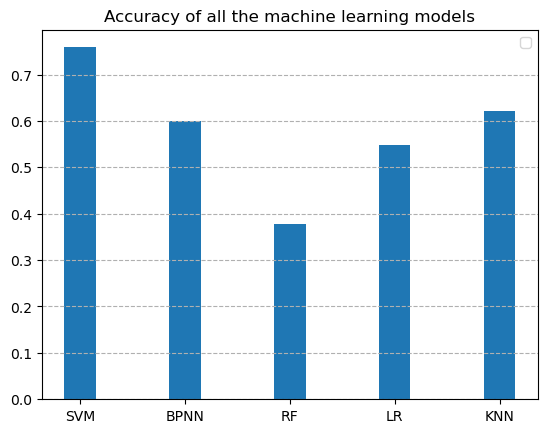

In [184]:
a1 = r2_score(Y_test, y_pred1)
print("Accuracy 3:", a1)
a2 = r2_score(Y_test[:,:], y_pred2[:,:])
print("Accuracy 3:", a2)
a3 = r2_score(Y_test[:,:], y_pred3[:,:])
print("Accuracy 3:", a3)
a4 = r2_score(Y_test[:,:], y_pred4[:,:])
print("Accuracy 3:", a4)
a5 = r2_score(Y_test[:,:], y_pred5[:,:])
print("Accuracy 3:", a5)
x = np.array(["SVM", "BPNN", "RF", "LR","KNN"])
y = np.array([a1,a2,a3,a4,a5])
z=np.array([a1*100,a2*100,a3*100,a4*100,a5*100])
plt.bar(x,y,width=0.3)
plt.grid(axis='y',linestyle = '--')
plt.title('Accuracy of all the machine learning models')
plt.legend()
plt.show()


Graphs for UCS

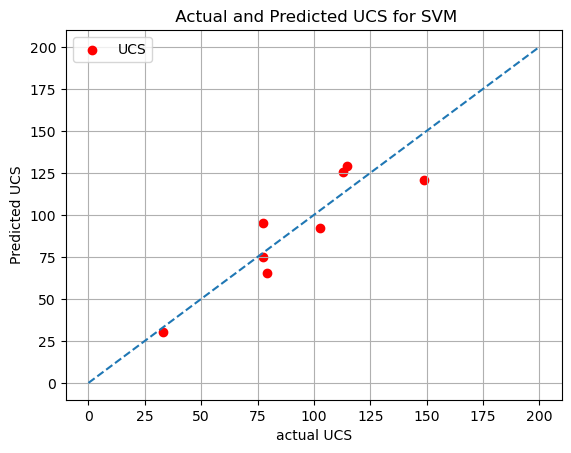

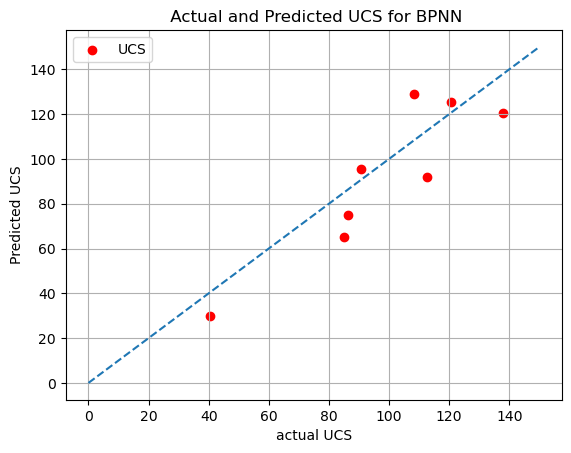

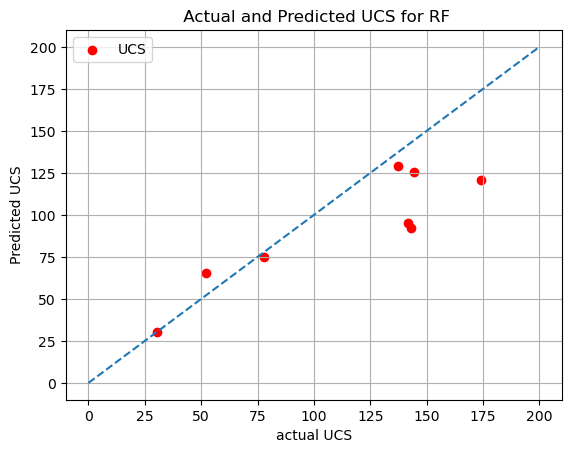

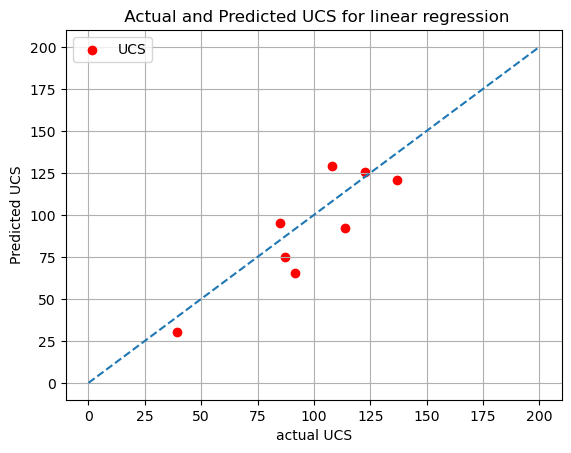

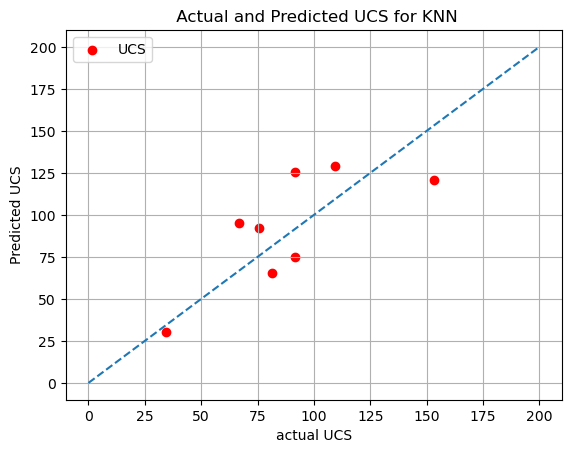

In [173]:
plt.scatter(y_pred1[:,0], Y_test[:, 0], color='red', label='UCS')
plt.xlabel('actual UCS')
plt.ylabel('Predicted UCS')
plt.title(' Actual and Predicted UCS for SVM')
x_p=np.array([0,200])
y_p=np.array([0,200])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.legend()
plt.show()
plt.scatter(y_pred2[:,0], Y_test[:, 0], color='red', label='UCS')
plt.xlabel('actual UCS')
plt.ylabel('Predicted UCS')
x_p=np.array([0,150])
y_p=np.array([0,150])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted UCS for BPNN')
plt.legend()
plt.show()
plt.scatter(y_pred3[:,0], Y_test[:, 0], color='red', label='UCS')
plt.xlabel('actual UCS')
plt.ylabel('Predicted UCS')
x_p=np.array([0,200])
y_p=np.array([0,200])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted UCS for RF')
plt.legend()
plt.show()
plt.scatter(y_pred4[:,0], Y_test[:, 0], color='red', label='UCS')
plt.xlabel('actual UCS')
plt.ylabel('Predicted UCS')
x_p=np.array([0,200])
y_p=np.array([0,200])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted UCS for linear regression')
plt.legend()
plt.show()
plt.scatter(y_pred5[:,0], Y_test[:, 0], color='red', label='UCS')
plt.xlabel('actual UCS')
plt.ylabel('Predicted UCS')
x_p=np.array([0,200])
y_p=np.array([0,200])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted UCS for KNN')
plt.legend()
plt.show()


Graphs for Elasticity Prediction

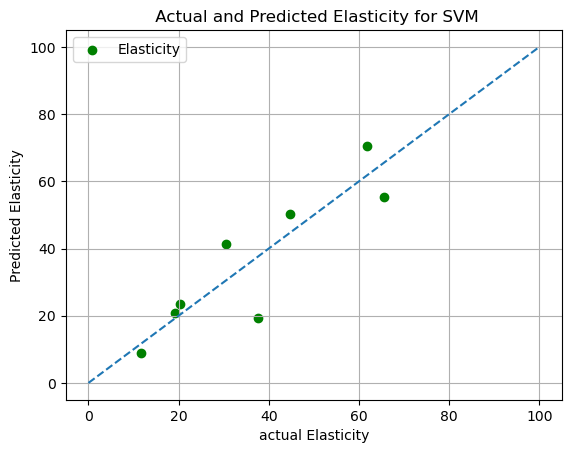

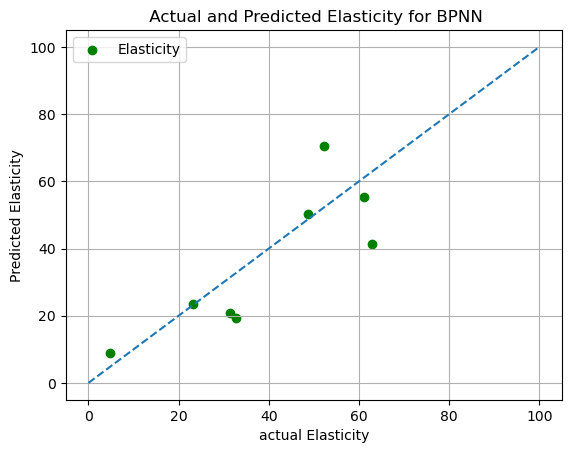

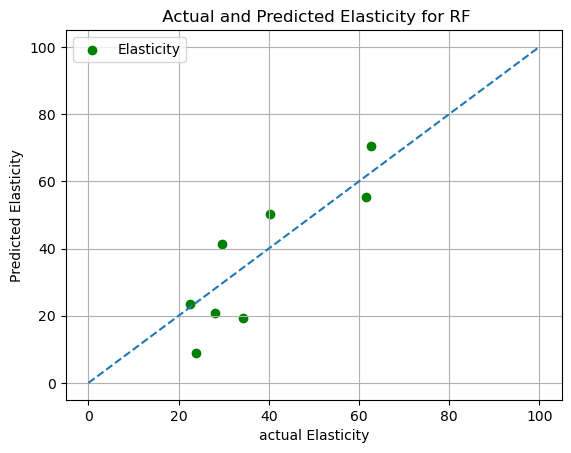

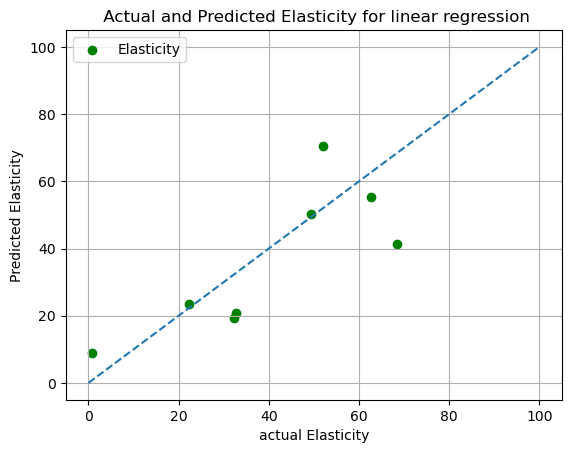

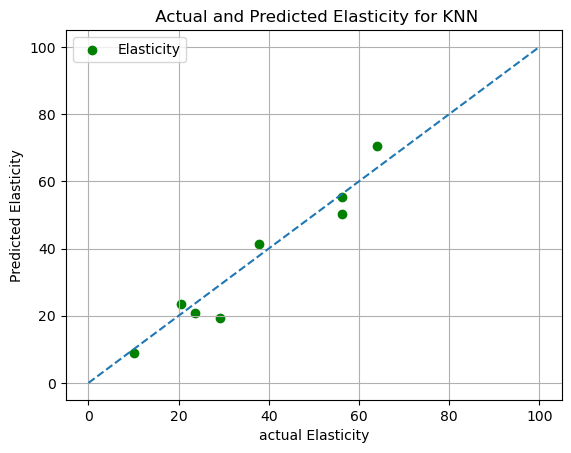

In [172]:
plt.scatter(y_pred1[:,1], Y_test[:, 1], color='green', label='Elasticity')
plt.xlabel('actual Elasticity')
plt.ylabel('Predicted Elasticity')
plt.title(' Actual and Predicted Elasticity for SVM')
x_p=np.array([0,100])
y_p=np.array([0,100])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.legend()
plt.show()
plt.scatter(y_pred2[:,1], Y_test[:, 1], color='green', label='Elasticity')
plt.xlabel('actual Elasticity')
plt.ylabel('Predicted Elasticity')
x_p=np.array([0,100])
y_p=np.array([0,100])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Elasticity for BPNN')
plt.legend()
plt.show()
plt.scatter(y_pred3[:,1], Y_test[:, 1], color='green', label='Elasticity')
plt.xlabel('actual Elasticity')
plt.ylabel('Predicted Elasticity')
x_p=np.array([0,100])
y_p=np.array([0,100])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Elasticity for RF')
plt.legend()
plt.show()
plt.scatter(y_pred4[:,1], Y_test[:, 1], color='green', label='Elasticity')
plt.xlabel('actual Elasticity')
plt.ylabel('Predicted Elasticity')
x_p=np.array([0,100])
y_p=np.array([0,100])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Elasticity for linear regression')
plt.legend()
plt.show()
plt.scatter(y_pred5[:,1], Y_test[:, 1], color='green', label='Elasticity')
plt.xlabel('actual Elasticity')
plt.ylabel('Predicted Elasticity')
x_p=np.array([0,100])
y_p=np.array([0,100])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Elasticity for KNN')
plt.legend()
plt.show()
#....................................................


Graphs for Brazilian Strength

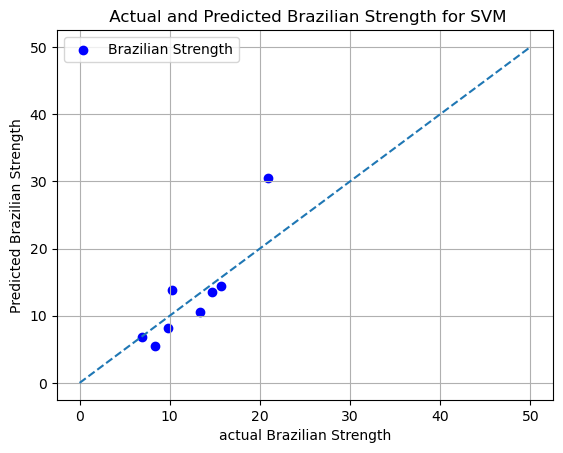

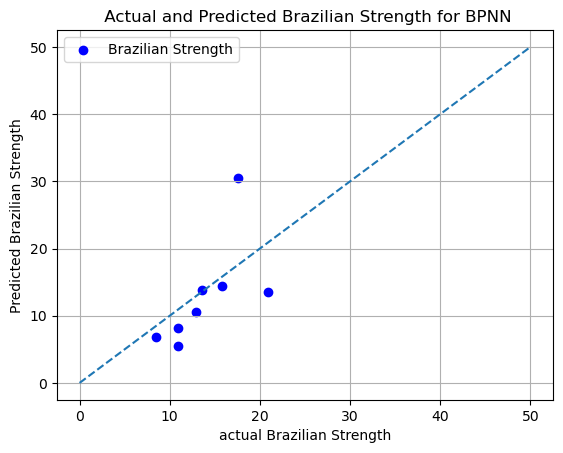

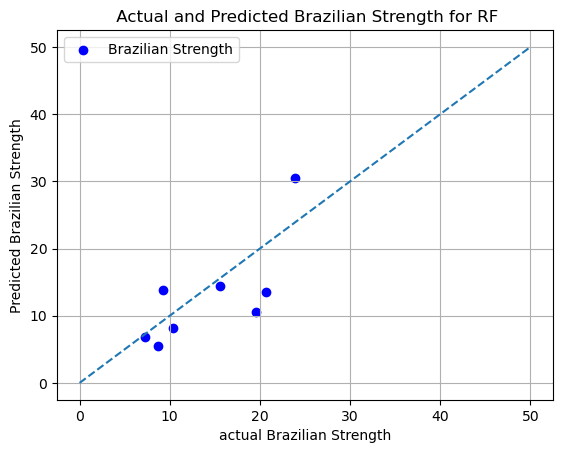

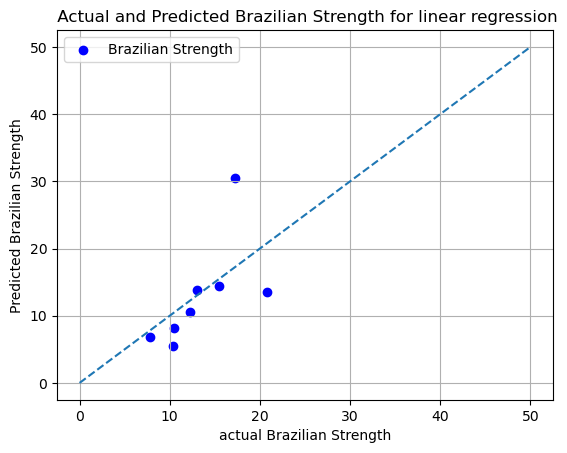

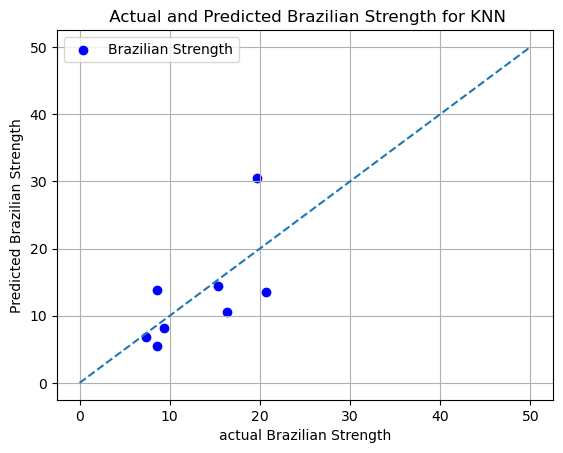

In [189]:
plt.scatter(y_pred1[:,2], Y_test[:, 2], color='blue', label='Brazilian Strength')
plt.xlabel('actual Brazilian Strength')
plt.ylabel('Predicted Brazilian Strength')
plt.title(' Actual and Predicted Brazilian Strength for SVM')
x_p=np.array([0,50])
y_p=np.array([0,50])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.legend()
plt.show()
plt.scatter(y_pred2[:,2], Y_test[:, 2], color='blue', label='Brazilian Strength')
plt.xlabel('actual Brazilian Strength')
plt.ylabel('Predicted Brazilian Strength')
x_p=np.array([0,50])
y_p=np.array([0,50])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Brazilian Strength for BPNN')
plt.legend()
plt.show()
plt.scatter(y_pred3[:,2], Y_test[:, 2], color='blue', label='Brazilian Strength')
plt.xlabel('actual Brazilian Strength')
plt.ylabel('Predicted Brazilian Strength')
x_p=np.array([0,50])
y_p=np.array([0,50])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Brazilian Strength for RF')
plt.legend()
plt.show()
plt.scatter(y_pred4[:,2], Y_test[:, 2], color='blue', label='Brazilian Strength')
plt.xlabel('actual Brazilian Strength')
plt.ylabel('Predicted Brazilian Strength')
x_p=np.array([0,50])
y_p=np.array([0,50])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Brazilian Strength for linear regression')
plt.legend()
plt.show()
plt.scatter(y_pred5[:,2], Y_test[:, 2], color='blue', label='Brazilian Strength')
plt.xlabel('actual Brazilian Strength')
plt.ylabel('Predicted Brazilian Strength')
x_p=np.array([0,50])
y_p=np.array([0,50])
plt.plot(x_p,y_p,linestyle = '--')
plt.grid()
plt.title(' Actual and Predicted Brazilian Strength for KNN')
plt.legend()
plt.show()